# Laptop Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

## Load Data 

In [2]:
data=pd.read_csv("laptop_data.csv")
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
data.shape

(1303, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## EDA

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
data.drop(columns=['Unnamed: 0'],inplace=True)

## Categorical Features

In [8]:
data['Ram']=data['Ram'].str.replace('GB','')
data['Weight']=data['Weight'].str.replace('kg','')

In [9]:
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype('float32')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [11]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if'Touchscreen' in x else 0)

In [12]:
new = data['ScreenResolution'].str.split('x',n=1,expand=True)

In [13]:
data['X_res'] = new[0]
data['Y_res'] = new[1]

In [14]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,IPS Panel Retina Display 2560,1600


In [15]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [16]:
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [17]:
data.drop(columns=['ScreenResolution'],inplace=True)

In [18]:
data['Cpu Brand'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [19]:
data.drop(columns=['Cpu'], inplace=True)

In [20]:
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [21]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')

new = data["Memory"].str.split("+", n=1, expand=True)

data["first"] = new[0]
data["first"] = data["first"].str.strip()

data["second"] = new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['first'] = data['first'].str.replace(r'\D', '', regex=True)
data["second"] = data["second"].fillna("0")


data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '', regex=True)

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"] = (data["first"] * data["Layer1HDD"] + data["second"] * data["Layer2HDD"])
data["SSD"] = (data["first"] * data["Layer1SSD"] + data["second"] * data["Layer2SSD"])
data["Hybrid"] = (data["first"] * data["Layer1Hybrid"] + data["second"] * data["Layer2Hybrid"])
data["Flash_Storage"] = (data["first"] * data["Layer1Flash_Storage"] + data["second"] * data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

In [22]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,X_res,Y_res,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,Intel Core i5,0,256,0,0


In [23]:
data.drop(columns=['Memory'],inplace=True)

In [24]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [25]:
data['Gpu Brand']=data['Gpu'].apply(lambda x:x.split()[0])

In [26]:
data['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [27]:
data = data[data['Gpu Brand'] != 'ARM']

In [28]:
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [29]:
def simplify_os(os):
    if 'Windows' in os:
        return 'Windows'
    elif 'Mac' in os or 'macOS' in os:
        return 'Mac'
    elif 'Linux' in os or 'Chrome' in os or 'Android' in os:
        return 'Other'
    elif 'No OS' in os:
        return 'No OS'
    else:
        return 'Other'

data['OpSys'] = data['OpSys'].apply(simplify_os)


In [30]:
data.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,X_res,Y_res,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,2560,1600,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,1440,900,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,2880,1800,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,2560,1600,Intel Core i5,0,256,0,0,Intel


## Bar Plot of Categorical Features

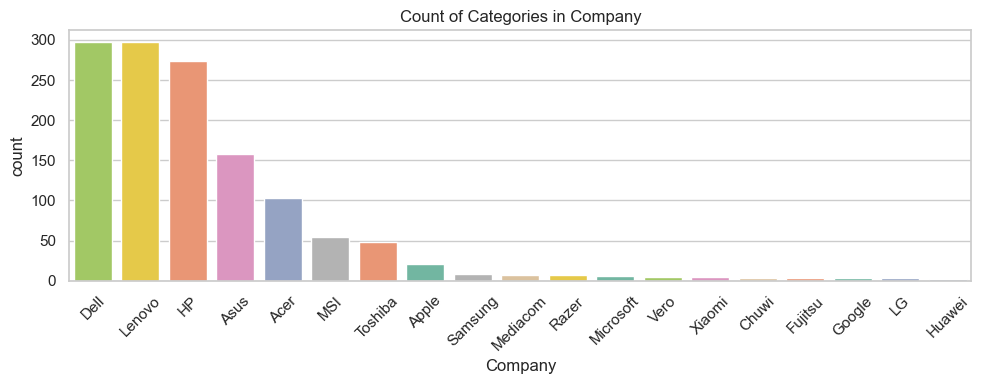

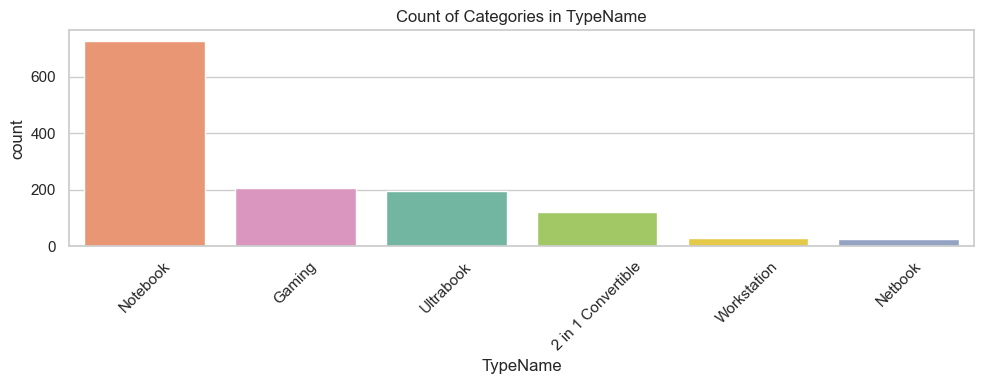

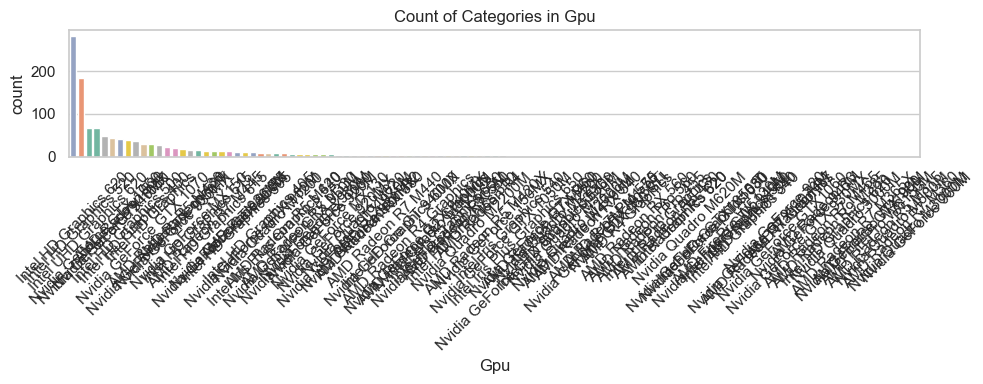

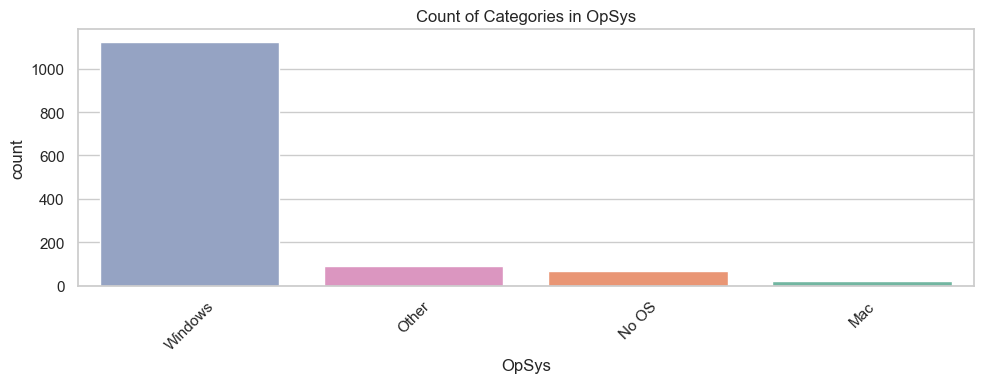

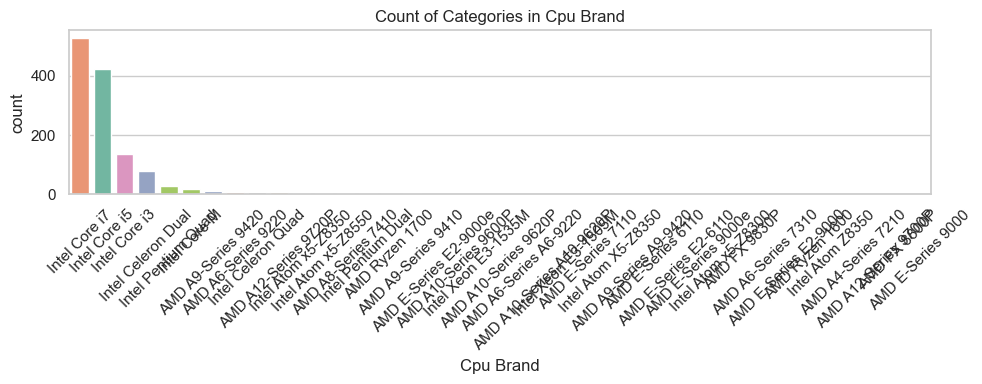

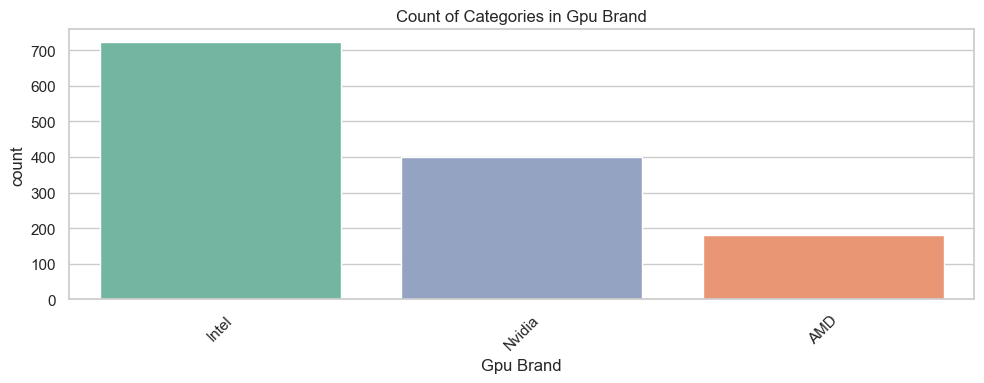

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, hue=col, palette='Set2', legend=False,
                  order=data[col].value_counts().index)
    plt.title(f'Count of Categories in {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Numerical Features

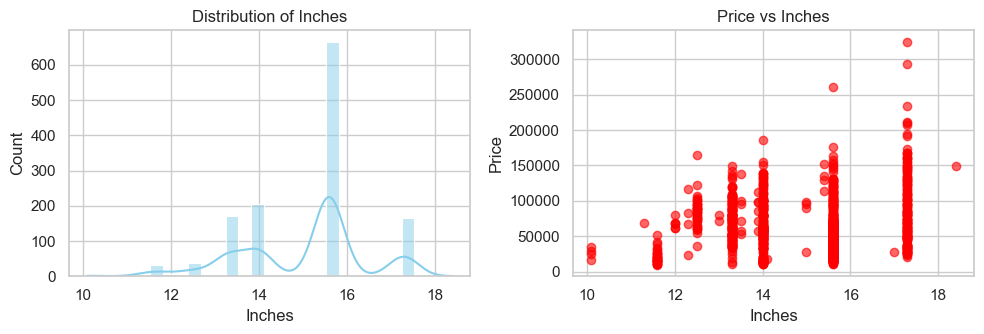

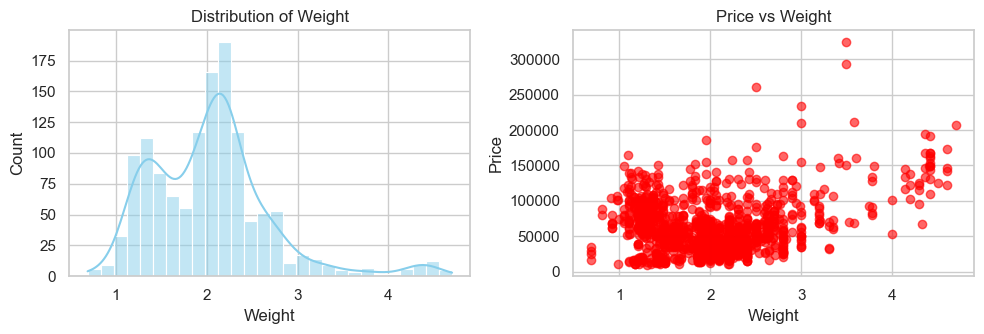

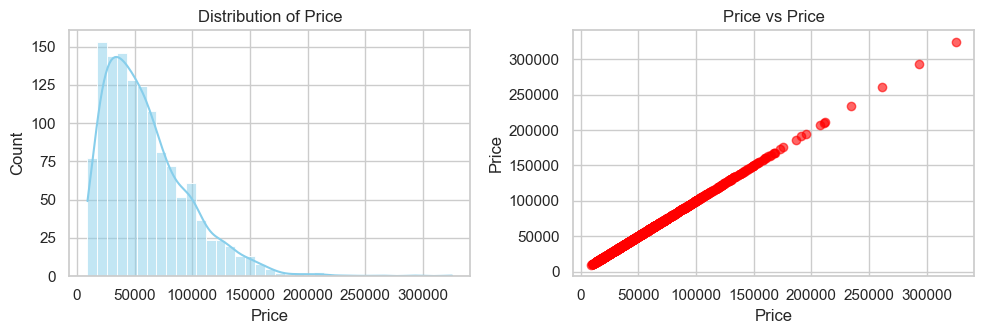

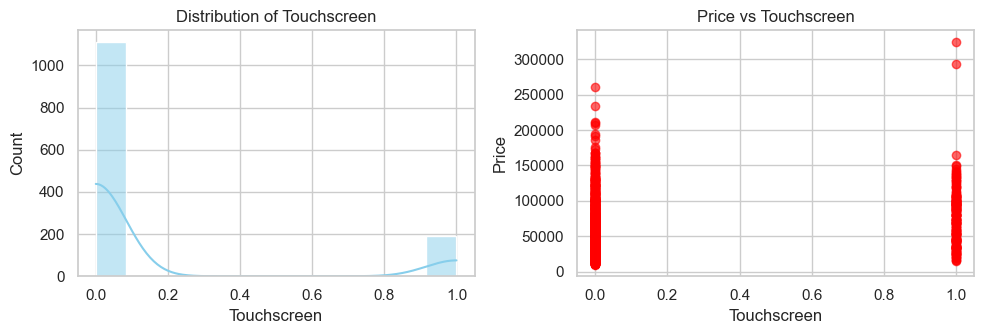

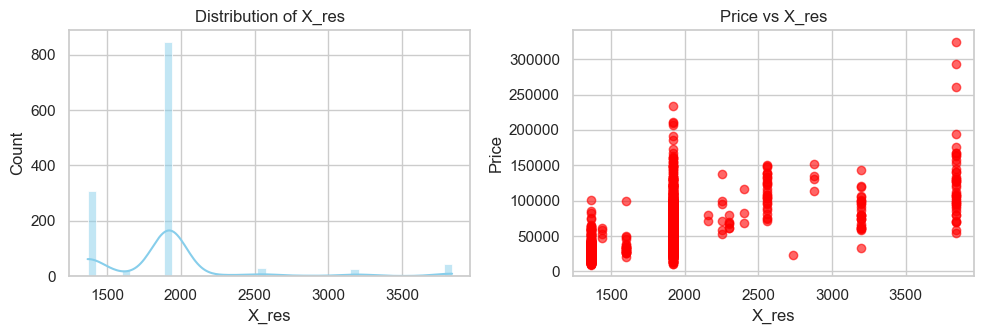

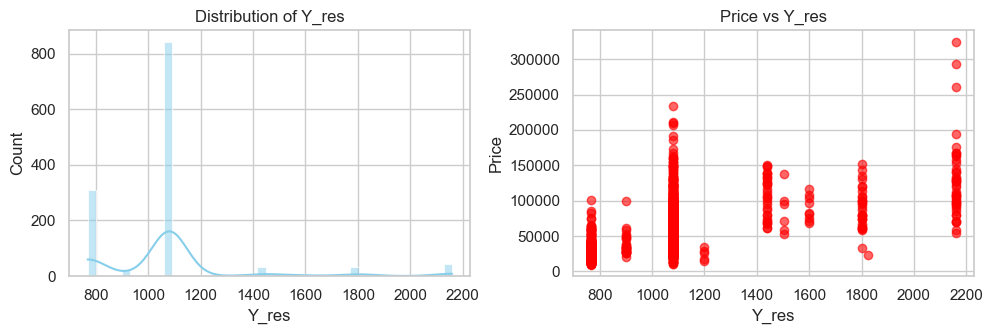

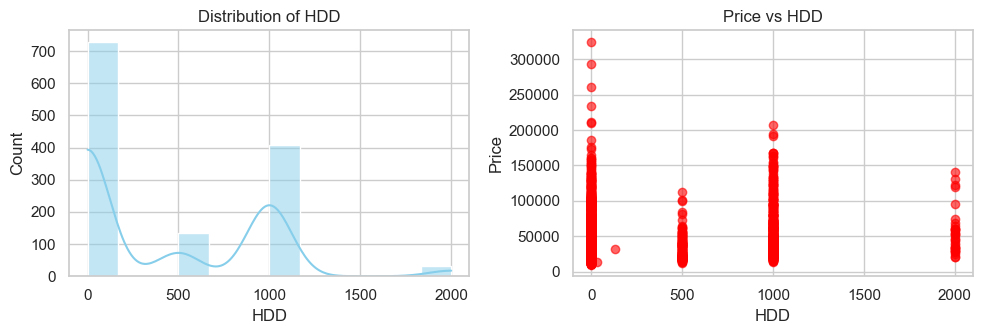

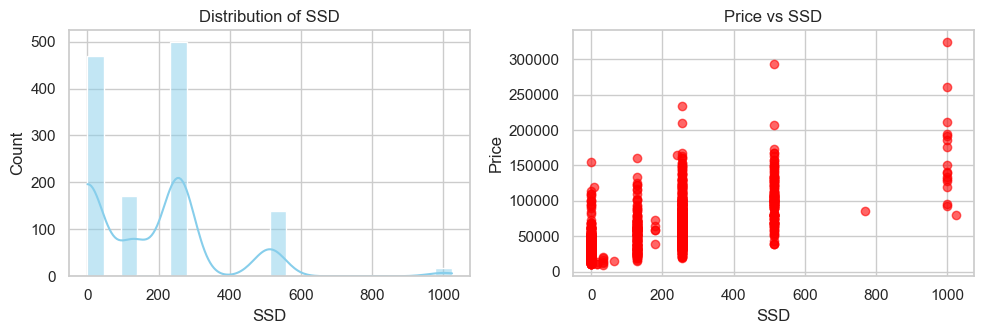

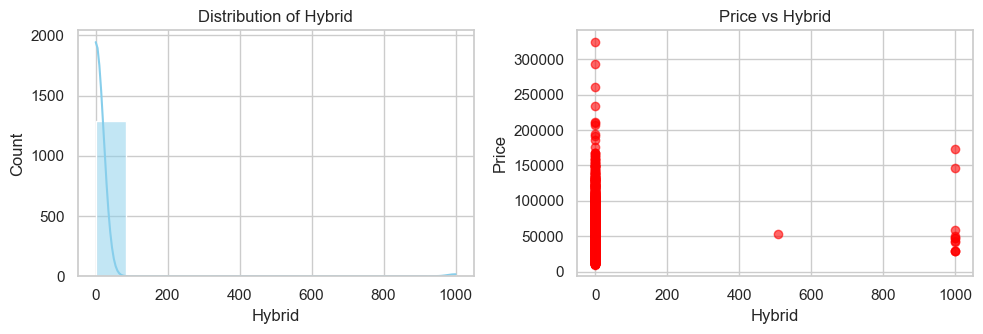

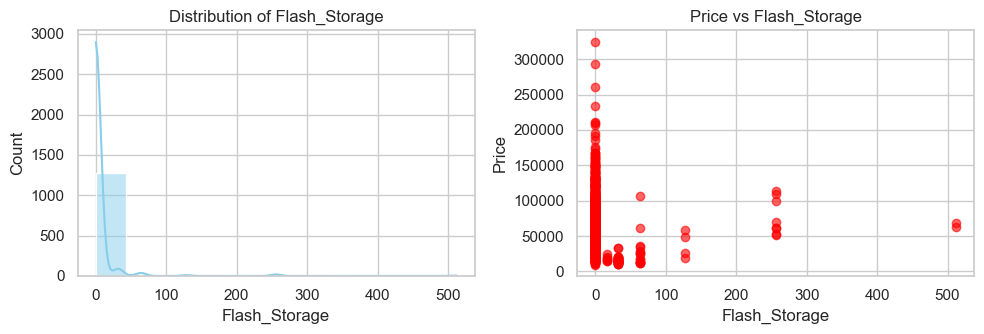

In [32]:
def plot_d(data, feature):
    plt.figure(figsize=(10, 3.5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    plt.scatter(data[feature], data['Price'], color='red', alpha=0.6)
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")

    plt.tight_layout()
    plt.show()

numerical_features = data.select_dtypes(include=['int64', 'float64', 'float32']).columns.tolist()

for feature in numerical_features:
    plot_d(data, feature)



## Correlation with respect to price

In [33]:
data.select_dtypes(include=['int64', 'float64']).corr()['Price']


Inches           0.067329
Price            1.000000
Touchscreen      0.192917
X_res            0.557369
Y_res            0.554591
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

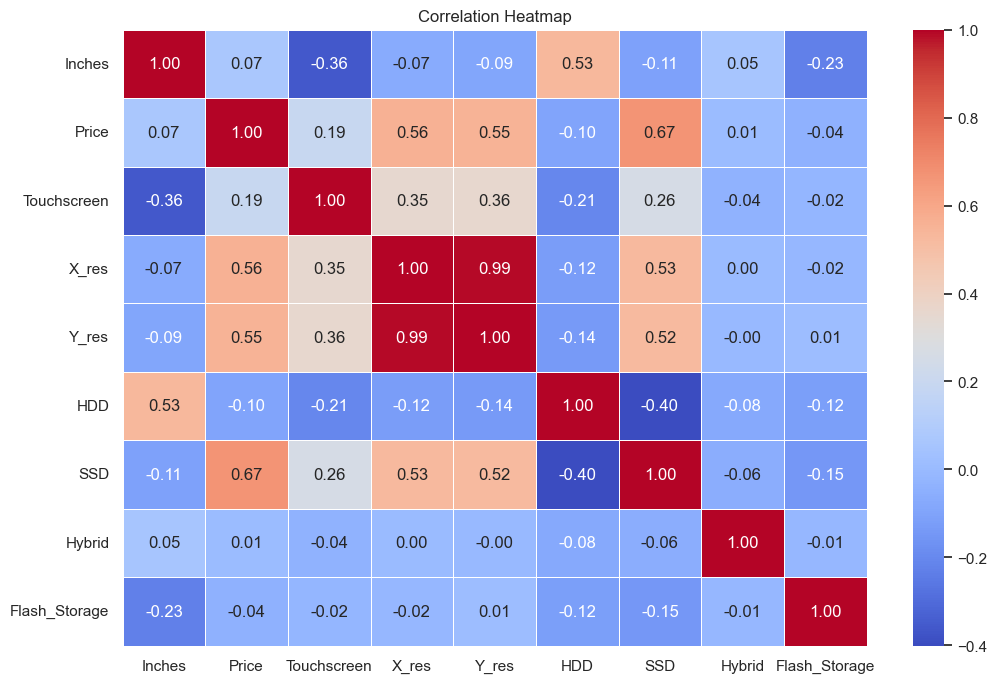

In [34]:
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

## Log Transformation

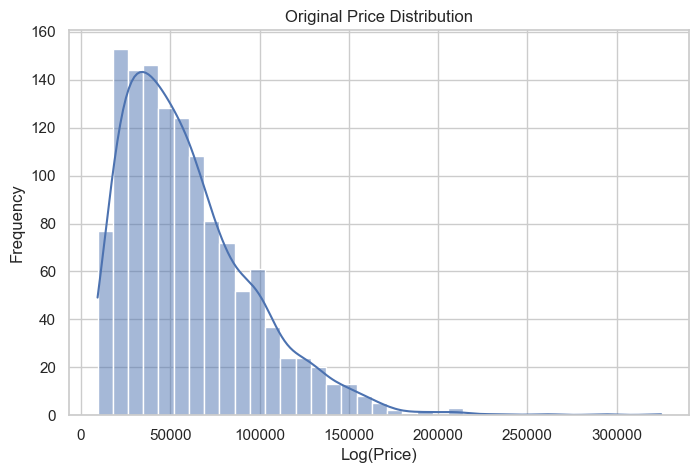

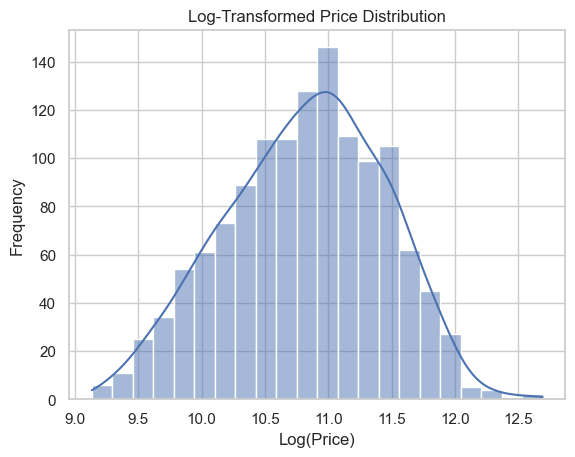

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], kde=True)
plt.title('Original Price Distribution')
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()

sns.histplot(np.log(data['Price']), kde=True)
plt.title('Log-Transformed Price Distribution')

plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()

In [36]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [37]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

## Encoding Categorical Features

In [38]:
data_encoded = pd.get_dummies(data, columns=['Company', 'TypeName', 'Gpu', 'OpSys', 'Cpu Brand', 'Gpu Brand'], drop_first=True)
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']

## Train-Test Split and Prediction

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune these
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = rf.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.8457012061520239
MAE: 8491.704084470555


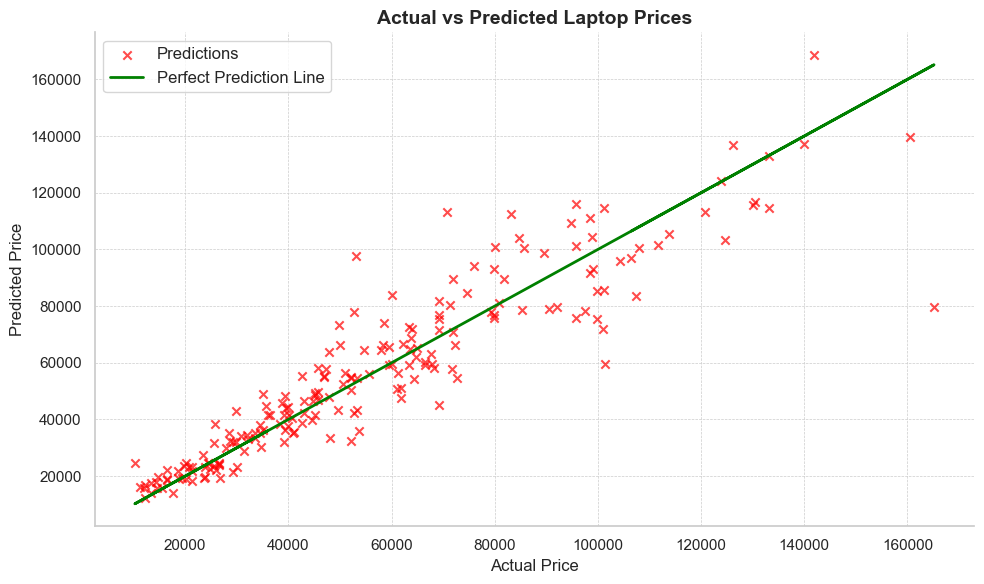

In [42]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='red', marker='x', label='Predictions', alpha=0.7)

plt.plot(y_test, y_test, color='green', label='Perfect Prediction Line', linewidth=2)

plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.title("Actual vs Predicted Laptop Prices", fontsize=14, weight='bold')

plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()